In [19]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from mountain_goat.grip_detection import get_grips
from mountain_goat.main import next_position

In [85]:
from dotenv import load_dotenv

In [86]:
load_dotenv('/home/william/code/ar10000/mountain_goat/.env')

True

In [4]:
model_path = '/home/william/code/ar10000/mountain_goat/raw_data/output/model_final.pth'

In [3]:
image = '/home/william/code/ar10000/mountain_goat/Screenshot 2022-08-29 at 12.07.37.png'
outputs =get_grips(image, model_path)

FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/mountain_goat_UCSD/hold_detection_dataset/train/_annotations.coco.json'

In [202]:
outputs.shape


(100, 4)

In [203]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import colorsys
from webcolors

In [204]:

im = cv2.imread(image)

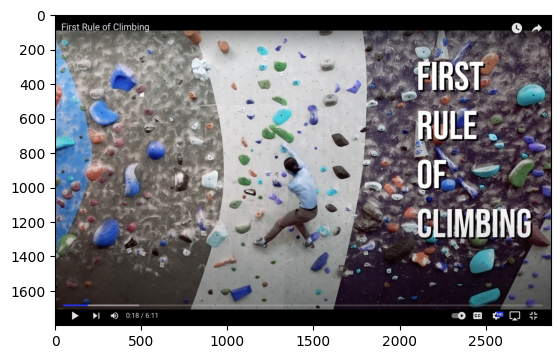

In [205]:
plt.imshow(im)

In [206]:
def getColorBin(img, tl, br):
    # Creates mask over image focus
    mask = np.zeros(img.shape[:2], np.uint8)# creates a  2D mask
    mask[tl[1]:br[1], tl[0]:br[0]] = 255

    # Effecively quantizes the image when the histogram is made.
    # Useful for grouping similar colors.
    binLen = 4
    numBins = int(256 / binLen)
#     plt.imshow(mask)
    #Finds the most common color/in the histogram/for each color channel.
    binColor = map(
        lambda x: np.argmax(
        [cv2.calcHist([img],[x],mask,[numBins],[0,256])])
        ,[0,1,2])
    binColor= list(binColor)
#     ipdb.set_trace()
    fullColor = map(lambda x: x * binLen, binColor)
    fullColor =list(fullColor)
    return fullColor 

In [207]:
len(outputs)

100

In [274]:
def findColors(img, holds):
    # If no keypoints return nothing
    if len(holds)== 0:
        return []

    # Shift colorspace to HLS
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    # Preallocate space for color array corresponding to keypoints
    colors = np.empty([len(holds),3])
    for i, key in enumerate(holds):
#         print(i)
        br = (int(key[2]), int(key[3]))
        tl = (int(key[0]), int(key[1]))
#         print(br, tl)
        colors[i] = getColorBin(img,tl,br)
    return colors

In [275]:

colors = findColors(im, outputs)

In [276]:
colors

array([[ 68.,  96.,  60.],
       [128., 140., 116.],
       [ 32.,  76., 196.],
       [204., 200., 204.],
       [108.,  96., 196.],
       [184., 184., 184.],
       [208., 208., 212.],
       [104., 184.,  96.],
       [192., 192., 192.],
       [212., 212., 212.],
       [ 64., 144., 224.],
       [ 24., 180., 188.],
       [196., 200., 200.],
       [196., 188., 188.],
       [ 68., 204.,  72.],
       [ 20.,  96., 216.],
       [196., 192., 188.],
       [148., 148., 148.],
       [ 80., 132.,  80.],
       [ 72., 124.,  76.],
       [ 24.,   8.,   8.],
       [212., 216., 216.],
       [ 72.,  68.,  68.],
       [ 48.,  96.,  88.],
       [ 84.,  68.,  68.],
       [ 76.,  84., 172.],
       [ 40.,   8.,  20.],
       [204., 216., 220.],
       [120., 132., 132.],
       [108., 212., 220.],
       [184., 176., 176.],
       [212., 220., 224.],
       [136., 172., 172.],
       [104.,  68.,  76.],
       [104.,  76.,  84.],
       [168., 156., 132.],
       [ 72., 136.,  88.],
 

In [211]:
colorsys.hls_to_rgb(116., 120.,  32.)

(-3688.0, 3928.0, 3928.0)

In [212]:
def plotColors(colors):

    # Build 3D scatterplot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Initialize arrays
    hs = []
    ls = []
    ss = []

    # Color data is mapped between 0 and 1
    colors = colors/256

    for color in colors:
        hs.append(color[0])
        ls.append(color[1])
        ss.append(color[2])

    # Regain RGB Values to color each data point
    colorsRGB = map(colorsys.hls_to_rgb,hs,ls,ss) 
    colorsRGB =list(colorsRGB)
    # Plot points in HLS space
    ax.scatter(hs, ls, ss, c=colorsRGB, marker='o')

    ax.set_xlabel('Hue')
    ax.set_ylabel('Lightness')
    ax.set_zlabel('Saturation')

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)

    plt.title("Color Space of Keypoints")
    plt.show()
    return colorsRGB

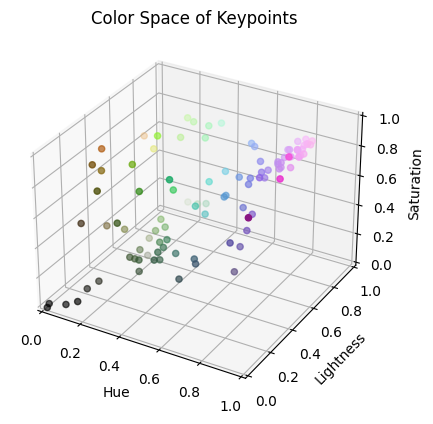

In [213]:
colorsRGB =plotColors(colors)

In [250]:
def draw(img, holds, colors):
    for i, key in enumerate(outputs):
#         print(i)
        br = (int(key[2]), int(key[3]))
        tl = (int(key[0]), int(key[1]))
#         print(br, tl)
        cv2.rectangle(img=img,pt1=tl,pt2=br,color=tuple(colors[i]),thickness=2)
    img = img[...,::-1]
# Display the resulting frame
    fig = plt.imshow(img)
    plt.title("Image with Keypoints")


In [251]:
len(colorsRGB)

100

In [252]:
colors[0]

array([68., 96., 60.])

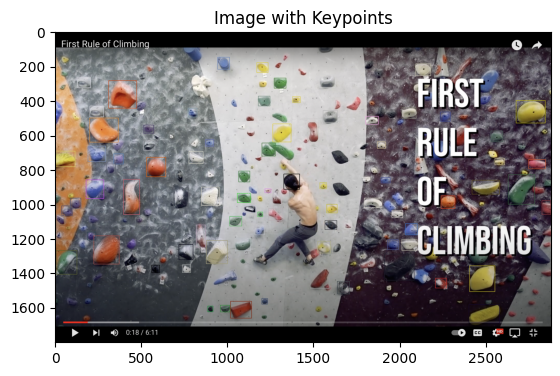

In [254]:
draw(im, outputs, colors)

In [256]:
rgb_to_name(int_colors[0])

ValueError: '#44603c' has no defined color name in css3

In [112]:
colorsRGB[0]

(0.34906005859375, 0.366455078125, 0.227294921875)

In [105]:
for i, color in enumerate(colors):
    print(i)
    print(color)

0
[48. 76. 60.]
1
[ 44. 128.  32.]
2
[112. 108.   8.]
3
[  0. 204.   4.]
4
[108. 100.  12.]
5
[ 88. 184.   4.]
6
[120. 208.   4.]
7
[ 48. 184.  16.]
8
[  0. 196.   0.]
9
[  0. 212.   4.]
10
[104. 148. 188.]
11
[ 92.  64. 140.]
12
[116. 200.  56.]
13
[  4. 188.  60.]
14
[60. 80. 60.]
15
[112. 104.  12.]
16
[ 40. 192.  16.]
17
[116. 148.   0.]
18
[ 60. 108.  36.]
19
[60. 92. 48.]
20
[ 8. 16. 16.]
21
[ 60. 216.   4.]
22
[ 0. 72.  4.]
23
[12. 96. 28.]
24
[172.  76.  24.]
25
[112. 104.  16.]
26
[ 92.  84. 128.]
27
[ 96. 212.  16.]
28
[ 96. 128.  20.]
29
[ 92. 148. 136.]
30
[ 12. 116.  12.]
31
[100. 220.   8.]
32
[ 92. 140.   8.]
33
[168.  84.  16.]
34
[172.  88.  16.]
35
[  8. 156.  20.]
36
[ 64. 108.  80.]
37
[ 4.  4. 20.]
38
[172. 100.  16.]
39
[  8. 220.  68.]
40
[44. 88. 24.]
41
[116. 216.  36.]
42
[  4. 208.  36.]
43
[108.  92. 152.]
44
[ 28. 172.   0.]
45
[120. 196.   8.]
46
[ 0. 96. 16.]
47
[ 12. 168.   4.]
48
[ 92. 160.  80.]
49
[  8. 128.  72.]
50
[ 92.  84. 112.]
51
[  4. 152.  84

In [260]:
import webcolors.css3_hex_to_names


ModuleNotFoundError: No module named 'webcolors.css3_hex_to_names'; 'webcolors' is not a package

In [269]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
        
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [270]:
closest_colour(colors[50])

'lightseagreen'

In [272]:
color_names ={}
for i , color in enumerate(colors):
    name = closest_colour(color)
    color_names[name]= color
    

In [273]:
color_names

{'darkolivegreen': array([104.,  80.,  68.]),
 'gray': array([120., 132., 132.]),
 'royalblue': array([ 60.,  96., 204.]),
 'lightgray': array([208., 208., 212.]),
 'slateblue': array([108.,  96., 196.]),
 'silver': array([208., 192., 192.]),
 'mediumseagreen': array([ 88., 192.,  84.]),
 'cornflowerblue': array([ 64., 144., 224.]),
 'lightseagreen': array([ 44., 168., 180.]),
 'limegreen': array([ 68., 204.,  72.]),
 'lightslategray': array([124., 156., 160.]),
 'seagreen': array([ 72., 136.,  88.]),
 'black': array([4., 4., 4.]),
 'darkslategray': array([48., 40., 36.]),
 'darkslateblue': array([ 64.,  56., 132.]),
 'skyblue': array([108., 212., 220.]),
 'darkgray': array([156., 168., 172.]),
 'gainsboro': array([216., 216., 220.]),
 'dimgray': array([104.,  88.,  84.]),
 'rosybrown': array([184., 136., 112.]),
 'sienna': array([148.,  84.,  76.]),
 'mediumturquoise': array([ 96., 196., 200.]),
 'indianred': array([176., 112., 104.]),
 'mediumorchid': array([216.,  80., 184.]),
 'for

2022-09-08 09:23:48.143942: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-09-08 09:23:49.289046: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-09-08 09:23:52.571926: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-09-08 09:23:52.617786: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond' has 5 outputs but the _output_shapes attribute specifies shapes for 46 outputs. Output shapes may be inaccurate.
2022-09-08 09:23:54.298455: W tensorflow/core/common_runtime/graph_constructor.cc:805] Node 'cond/while' has 13 outputs but the _output_sh

1/1 [==============================] - 9s 9s/step
WARNING [09/08 09:24:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[09/08 09:24:11 d2.data.datasets.coco]: Loaded 132 images in COCO format from /home/william/code/ar10000/mountain_goat_dataset/UCSD/train/_annotations.coco.json
[09/08 09:24:13 d2.checkpoint.c2_model_loading]: Following weights matched with model:
| Names in Model                                  | Names in Checkpoint                                                                                  | Shapes                                          |
|:------------------------------------------------|:-----------------------------------------------------------------------------------------------------|:------------------------------------------------|
| backbone.bottom_up.res2.0.conv1.*               | backbone.bottom_up.res2.0.conv1.{norm.bias,norm.running_mean,norm.running_var,norm.weight,weight}    |

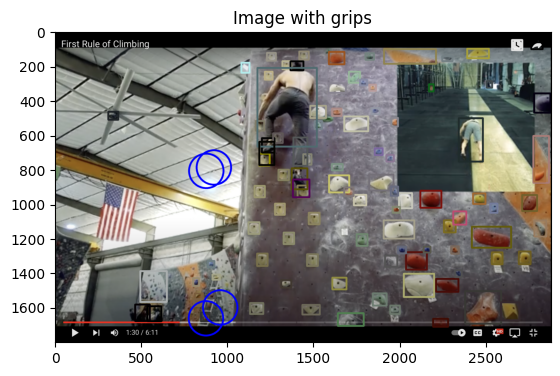

array([[0.48817146, 0.27995798, 0.5127395 , 0.27292818, 0.4867357 ,
        0.5773327 , 0.5333153 , 0.55533123]], dtype=float32)

In [21]:
grip_model = '/home/william/code/ar10000/mountain_goat/raw_data/output/model_final.pth'
next_position(grip_model)